In [1]:
!python --version


Python 3.11.13


In [2]:
import os
import pandas as pd

# Path to the extracted dataset
DATA_DIR = "../data/ml-100k"  # adjust path if needed


In [3]:
#load movie ratings
ratings_path = os.path.join(DATA_DIR, "u.data")

ratings = pd.read_csv(
    ratings_path,
    sep="\t",
    names=["userId", "movieId", "rating", "timestamp"],
    dtype={"userId": "int32", "movieId": "int32", "rating": "float32", "timestamp": "int64"}
)

# Quick look
ratings.head()


,userId,movieId,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [4]:
#load movie metadata
movies_path = os.path.join(DATA_DIR, "u.item")

movies = pd.read_csv(
    movies_path,
    sep="|",
    header=None,
    encoding="latin-1",
    usecols=[0, 1, 2, 4],  # movieId, title, release_date, imdb_url
    names=["movieId", "title", "release_date", "imdb_url"]
)

movies["movieId"] = movies["movieId"].astype("int32")

# Quick look
movies.head()


,movieId,title,release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995)


## EDA

In [5]:
# Basic info
n_users = ratings["userId"].nunique()
n_movies = ratings["movieId"].nunique()
n_ratings = len(ratings)

print(f"Users: {n_users}, Movies: {n_movies}, Ratings: {n_ratings}")

# Rating distribution
print(ratings["rating"].value_counts().sort_index())

# Check duplicates and missing values
print("Duplicate rows:", ratings.duplicated().sum())
print("Missing values:", ratings.isna().sum().to_dict())


Users: 943, Movies: 1682, Ratings: 100000
rating
1.0     6110
2.0    11370
3.0    27145
4.0    34174
5.0    21201
Name: count, dtype: int64
Duplicate rows: 0
Missing values: {'userId': 0, 'movieId': 0, 'rating': 0, 'timestamp': 0}


In [6]:
# Ratings info
print("Ratings DataFrame Info:")
ratings.info()

# Movies info
print("\nMovies DataFrame Info:")
movies.info()


Ratings DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100000 non-null  int32  
 1   movieId    100000 non-null  int32  
 2   rating     100000 non-null  float32
 3   timestamp  100000 non-null  int64  
dtypes: float32(1), int32(2), int64(1)
memory usage: 1.9 MB

Movies DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movieId       1682 non-null   int32 
 1   title         1682 non-null   object
 2   release_date  1681 non-null   object
 3   imdb_url      1679 non-null   object
dtypes: int32(1), object(3)
memory usage: 46.1+ KB


In [7]:
n_users = ratings["userId"].nunique()
n_movies = ratings["movieId"].nunique()
n_ratings = len(ratings)

print(f"Number of users: {n_users}")
print(f"Number of movies: {n_movies}")
print(f"Total ratings: {n_ratings}")


Number of users: 943
Number of movies: 1682
Total ratings: 100000


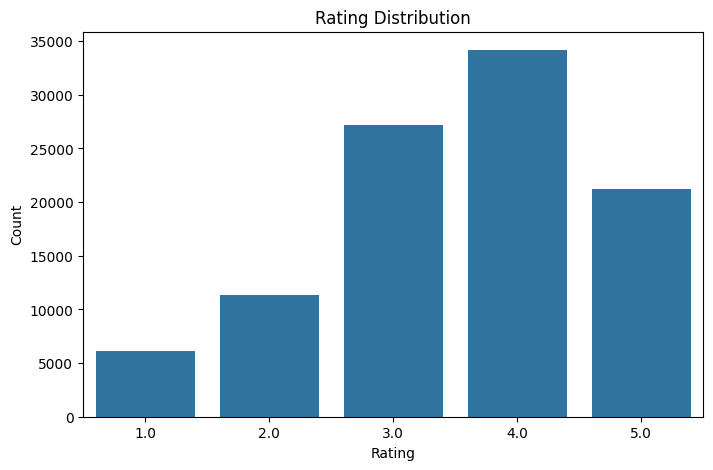

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x="rating", data=ratings)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


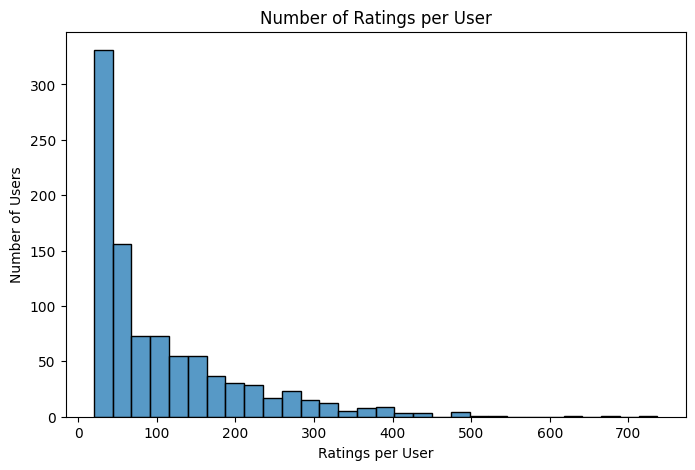

Stats per user:
count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: rating, dtype: float64


In [9]:
ratings_per_user = ratings.groupby("userId")["rating"].count()

plt.figure(figsize=(8,5))
sns.histplot(ratings_per_user, bins=30, kde=False)
plt.title("Number of Ratings per User")
plt.xlabel("Ratings per User")
plt.ylabel("Number of Users")
plt.show()

print("Stats per user:")
print(ratings_per_user.describe())


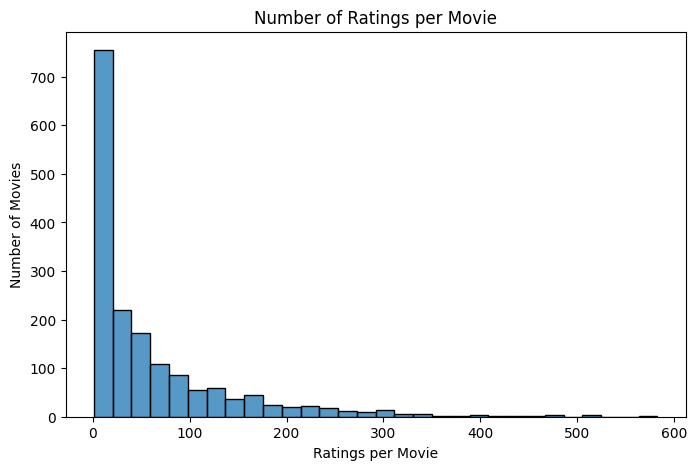

Stats per movie:
count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
Name: rating, dtype: float64


In [10]:
ratings_per_movie = ratings.groupby("movieId")["rating"].count()

plt.figure(figsize=(8,5))
sns.histplot(ratings_per_movie, bins=30, kde=False)
plt.title("Number of Ratings per Movie")
plt.xlabel("Ratings per Movie")
plt.ylabel("Number of Movies")
plt.show()

print("Stats per movie:")
print(ratings_per_movie.describe())


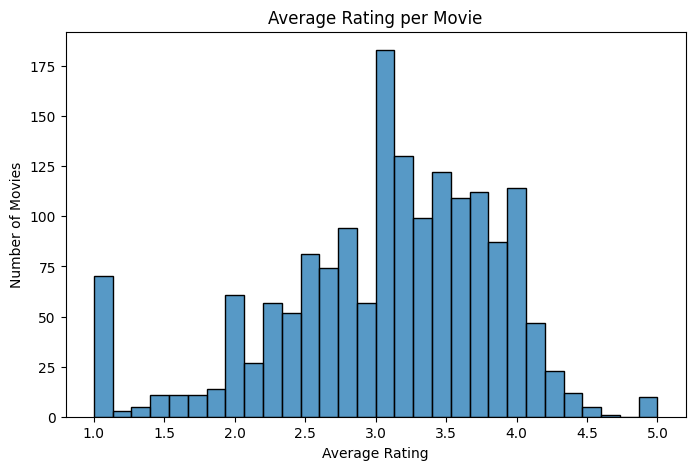

In [11]:
avg_rating_per_movie = ratings.groupby("movieId")["rating"].mean()

plt.figure(figsize=(8,5))
sns.histplot(avg_rating_per_movie, bins=30, kde=False)
plt.title("Average Rating per Movie")
plt.xlabel("Average Rating")
plt.ylabel("Number of Movies")
plt.show()


In [12]:
top_movies = ratings.groupby("movieId")["rating"].count().sort_values(ascending=False).head(10)
top_movies = top_movies.reset_index().merge(movies, on="movieId")

print("Top 10 most rated movies:")
top_movies[["title", "rating"]]


Top 10 most rated movies:


,title,rating
0,Star Wars (1977),583
1,Contact (1997),509
2,Fargo (1996),508
3,Return of the Jedi (1983),507
4,Liar Liar (1997),485
5,"English Patient, The (1996)",481
6,Scream (1996),478
7,Toy Story (1995),452
8,Air Force One (1997),431
9,Independence Day (ID4) (1996),429


## PREPROCESSING

In [13]:
RAW_DATA_DIR = "../data/ml-100k"
PROCESSED_DIR = "../data/processed"
os.makedirs(PROCESSED_DIR, exist_ok=True)

In [14]:
# Load ratings
ratings_path = os.path.join(RAW_DATA_DIR, "u.data")
ratings = pd.read_csv(
    ratings_path,
    sep="\t",
    names=["userId", "movieId", "rating", "timestamp"],
    dtype={"userId": "int32", "movieId": "int32", "rating": "float32", "timestamp": "int64"}
)

# Load movies
movies_path = os.path.join(RAW_DATA_DIR, "u.item")
movies = pd.read_csv(
    movies_path,
    sep="|",
    header=None,
    encoding="latin-1",
    usecols=[0, 1, 2, 4],
    names=["movieId", "title", "release_date", "imdb_url"]
)
movies["movieId"] = movies["movieId"].astype("int32")


In [15]:
# Dataset shapes
print("Ratings shape:", ratings.shape)
print("Movies shape:", movies.shape)

Ratings shape: (100000, 4)
Movies shape: (1682, 4)


In [16]:
movies.head()

,movieId,title,release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [17]:
# Remove duplicates & NAs
ratings = ratings.drop_duplicates().dropna()

# Map userId and movieId to zero-based indices
user_id_map = {old: new for new, old in enumerate(ratings["userId"].unique())}
ratings["user_idx"] = ratings["userId"].map(user_id_map)

movie_id_map = {old: new for new, old in enumerate(ratings["movieId"].unique())}
ratings["movie_idx"] = ratings["movieId"].map(movie_id_map)

# Optional: convert timestamp
ratings["datetime"] = pd.to_datetime(ratings["timestamp"], unit="s")


In [18]:
movies.head()

,movieId,title,release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [19]:
ratings.head()

,userId,movieId,rating,timestamp,user_idx,movie_idx,datetime
0,196,242,3.0,881250949,0,0,1997-12-04 15:55:49
1,186,302,3.0,891717742,1,1,1998-04-04 19:22:22
2,22,377,1.0,878887116,2,2,1997-11-07 07:18:36
3,244,51,2.0,880606923,3,3,1997-11-27 05:02:03
4,166,346,1.0,886397596,4,4,1998-02-02 05:33:16


In [20]:
# Map movieId to zero-based index
movies["movie_idx"] = movies["movieId"].map(movie_id_map)

# Keep only necessary columns
movies_clean = movies[["movieId", "movie_idx", "title", "release_date", "imdb_url"]]


In [22]:
import pickle
ratings.to_csv(os.path.join(PROCESSED_DIR, "ratings_processed.csv"), index=False)
movies_clean.to_csv(os.path.join(PROCESSED_DIR, "movies_processed.csv"), index=False)

# Save mapping dictionaries
with open(os.path.join(PROCESSED_DIR, "user_id_map.pkl"), "wb") as f:
    pickle.dump(user_id_map, f)
with open(os.path.join(PROCESSED_DIR, "movie_id_map.pkl"), "wb") as f:
    pickle.dump(movie_id_map, f)

print("Preprocessing complete. Files saved in 'data/processed/'")


Preprocessing complete. Files saved in 'data/processed/'
